In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy.modeling.models import Linear1D
from astropy.modeling.fitting import LinearLSQFitter
from astropy.modeling.polynomial import Polynomial1D
from specutils import Spectrum1D
from specutils import SpectralRegion
from specutils.analysis import equivalent_width,fwhm

import os
from astropy.modeling import models, fitting
from astropy.convolution import convolve_models
import glob


from astropy import constants as const
from astropy.io import ascii
import scipy.special as sp
from scipy.integrate import quad,simpson

from scipy.signal import convolve
from scipy.special import expit
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit,minimize

In [3]:
from EW_Ravi_v3 import SpectrumAnalyzer


In [4]:
from H2_funcs import *

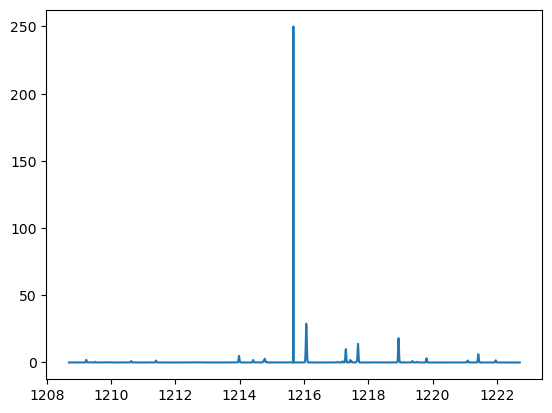

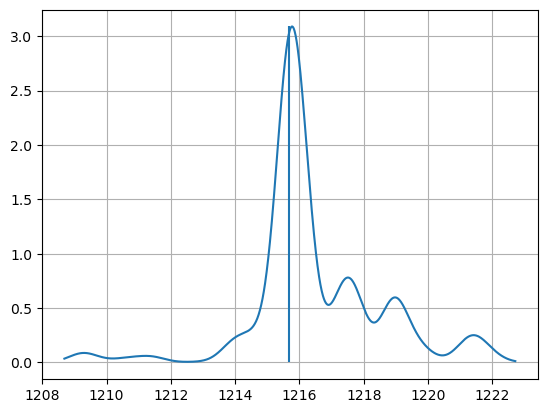

In [9]:
lam,lya_data,broad_lya_units = syn_lamp_func(amp=250,fwhm_G=1e-6,line_ratio=0.35,other_I=4e4)

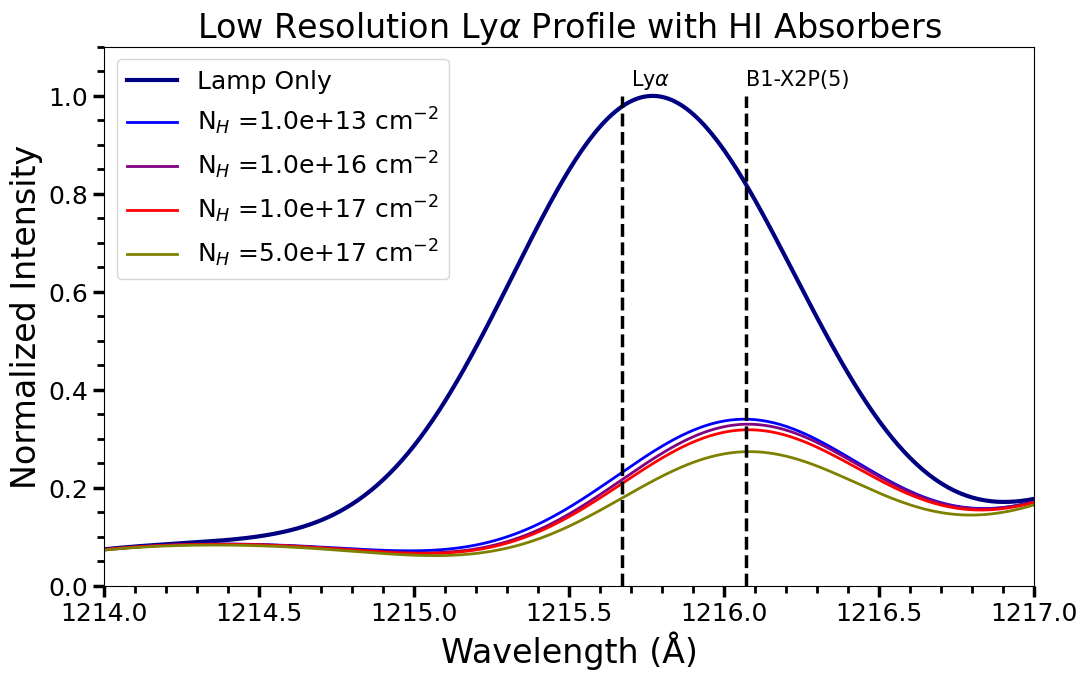

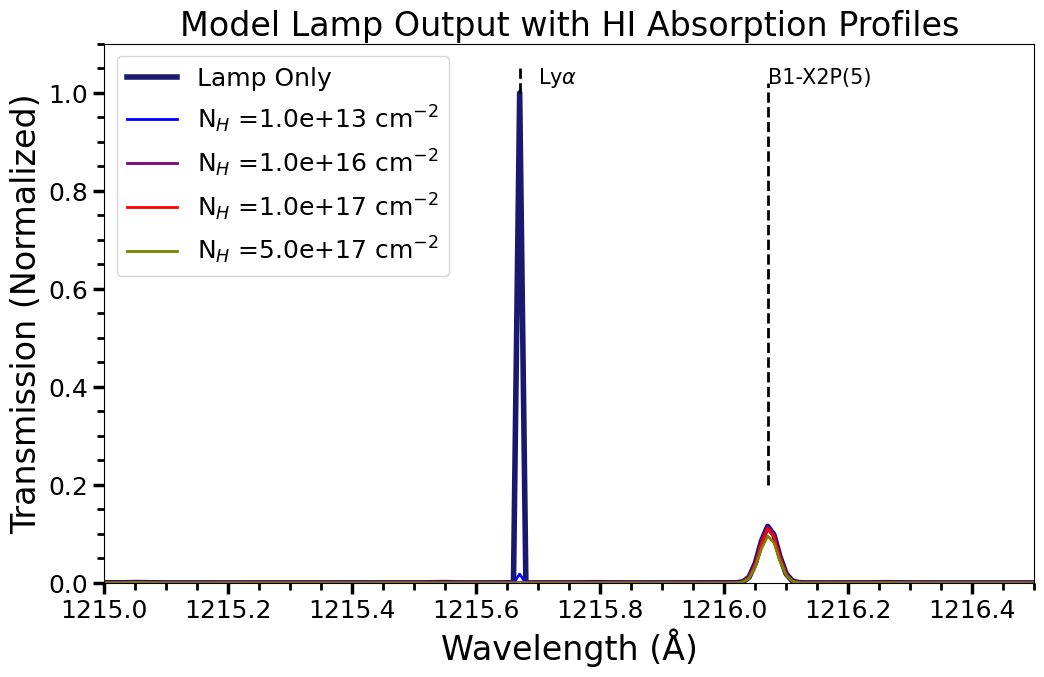

In [11]:
Nums=[13,16,17,np.log10(5e17)]
#N=1e16
plt.rcParams['font.size'] = 18  # Set the default font size

y1s,y2s,t1s,trans = model_cell(Nums,lam,lya_data)


cmap = plt.get_cmap('brg') # Choose your colormap
num_datasets = len(Nums)
colors = [cmap(i / num_datasets) for i in range(num_datasets)]


fig, axs = plt.subplots(1,1,figsize=(12,7))
y=y1s
norm=max(broad_lya_units)
cm2 = r'cm$^{-2}$'
axs.plot(lam,broad_lya_units/norm,color='navy',label='Lamp Only',lw=3)
for i,y in enumerate(y1s):
    axs.plot(lam,y/norm,ls='-',color=colors[i],alpha=1,label=fr'N$_H$ ={10**Nums[i]:.1e} '+cm2,lw=2)

axs.vlines(x=1215.67,ymin=0,ymax=1,color='black',ls='--',lw=2.5)
axs.vlines(x=1216.07,ymin=0,ymax=1,color='black',ls='--',lw=2.5)
#axs.hlines(y=0.5,xmin=1212,xmax=1220,color='red',ls='--',alpha=0.5)
axs.set_xlim(1214,1217)
#plt.ylim(0,0.0005)
axs.minorticks_on();
#axs.grid(color='grey');
#axs.grid(which='minor', linestyle=':',color='black',linewidth=0.5,alpha=0.7);
axs.legend(loc='upper left');

axs.set_title(r'Low Resolution Ly$\alpha$ Profile with HI Absorbers',fontsize=24)
axs.set_ylabel(r'Normalized Intensity',fontsize=24)
axs.set_xlabel(r'Wavelength (Å)',fontsize=24)

axs.text(1215.7,1.02,r'Ly$\alpha$',color='black',fontsize=15)
axs.text(1216.07,1.02,r'B1-X2P(5)',color='black',fontsize=15)
axs.tick_params(axis="both", which="major", length=8, width=2.5)  # Major ticks
axs.tick_params(axis="both", which="minor", length=5, width=2)  # Minor ticks
axs.set_ylim(0,1.1)
#axs[0].set_xticks(fontsize=16)

fig.savefig('Low_Res_model.png', bbox_inches="tight")


fig, axs = plt.subplots(1,1,figsize=(12,7))
y=y2s
norm=max(lya_data)
axs.plot(lam,lya_data/norm,'-',color='midnightblue',label='Lamp Only',lw=4)
for i,y in enumerate(y2s):
    #axs[1].plot(lam,y/norm,ls='--',alpha=0.7,label=f'{10**Nums[i]:.1e} '+cm2,color=colors[i])
    axs.plot(lam,y2s[i]/norm,ls='-',alpha=1,color=colors[i],label=fr'N$_H$ ={10**Nums[i]:.1e} '+cm2,lw=2)

#axs.vlines(x=1215.67,ymin=0,ymax=1,color='red',ls='--',alpha=0.5,label=f'1215.67$\AA$')
axs.set_xlim(1215,1216.5)
axs.set_ylim(0,1.1)
axs.vlines(x=1215.67,ymin=1,ymax=1.05,color='black',ls='--',lw=2)
axs.vlines(x=1216.07,ymin=0.2,ymax=1.02,color='black',ls='--',lw=2)
axs.text(1215.7,1.02,r'Ly$\alpha$',color='black',fontsize=15)
axs.text(1216.07,1.02,r'B1-X2P(5)',color='black',fontsize=15)
#axs.set_xlim(1214.5,1218)
#axs.set_ylim(0,max(y)+(0.1*max(y)))

axs.set_ylabel(r'Transmission (Normalized)',fontsize=24)
axs.set_xlabel(r'Wavelength (Å)',fontsize=24)
axs.set_title(r'Model Lamp Output with HI Absorption Profiles',fontsize=24)

axs.minorticks_on();
#axs.grid(which='minor', linestyle=':',color='black',linewidth=0.5,alpha=0.7);
axs.legend(loc='upper left')
axs.tick_params(axis="both", which="major", length=8, width=2.5)  # Major ticks
axs.tick_params(axis="both", which="minor", length=5, width=2)  # Minor ticks
#axs.grid();
fig.savefig('High_Res_lya.png', bbox_inches="tight")


C:\Users\jackf\Desktop\Rocket Group\LIDOS_data\EW_Ravi_v3.py:262: RuntimeWarning: divide by zero encountered in divide
  plt.step(self.lamda_lamp,self.y_e_cell_bin/self.y_e_lamp_bin)
C:\Users\jackf\Desktop\Rocket Group\LIDOS_data\EW_Ravi_v3.py:262: RuntimeWarning: invalid value encountered in divide
  plt.step(self.lamda_lamp,self.y_e_cell_bin/self.y_e_lamp_bin)


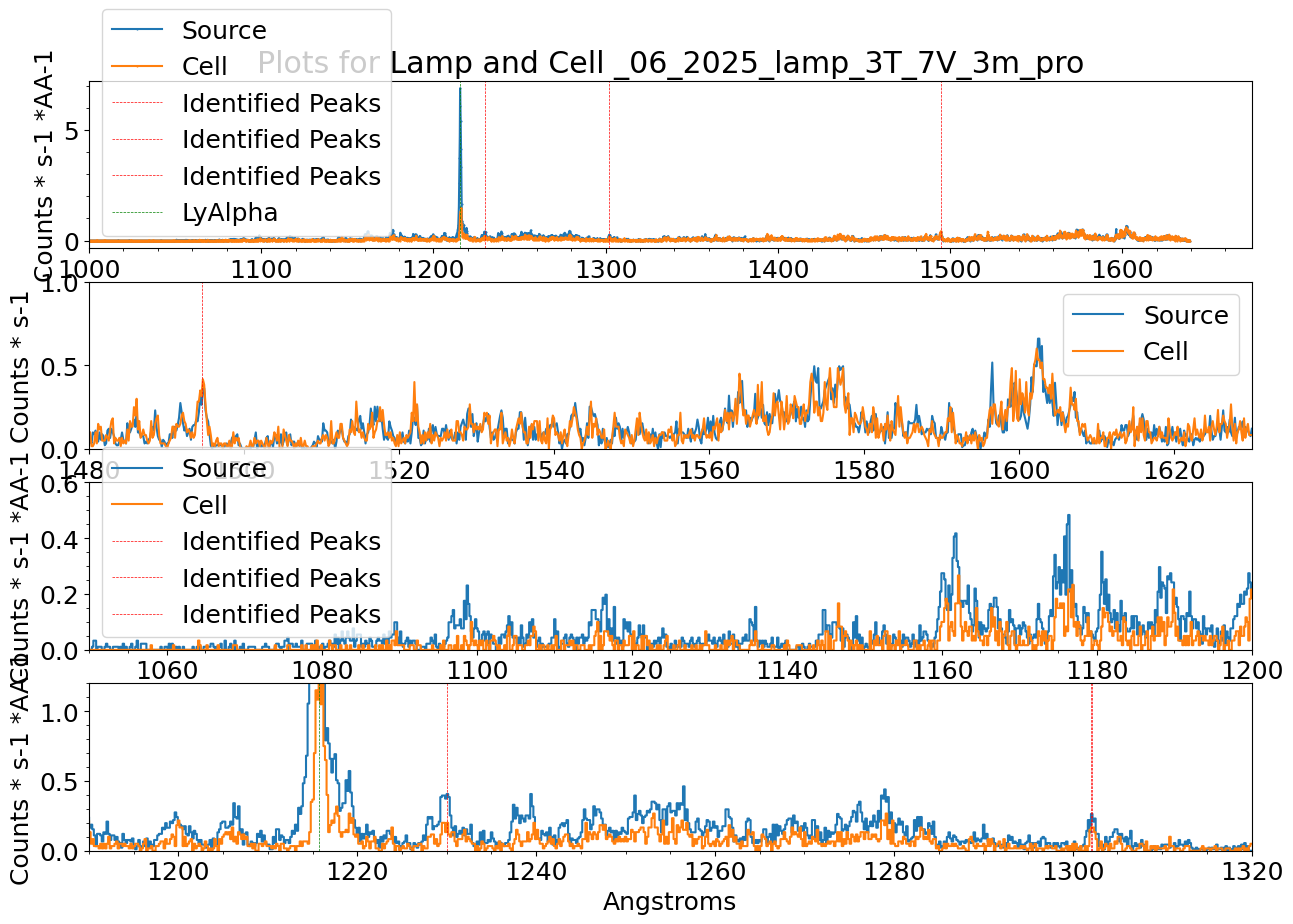

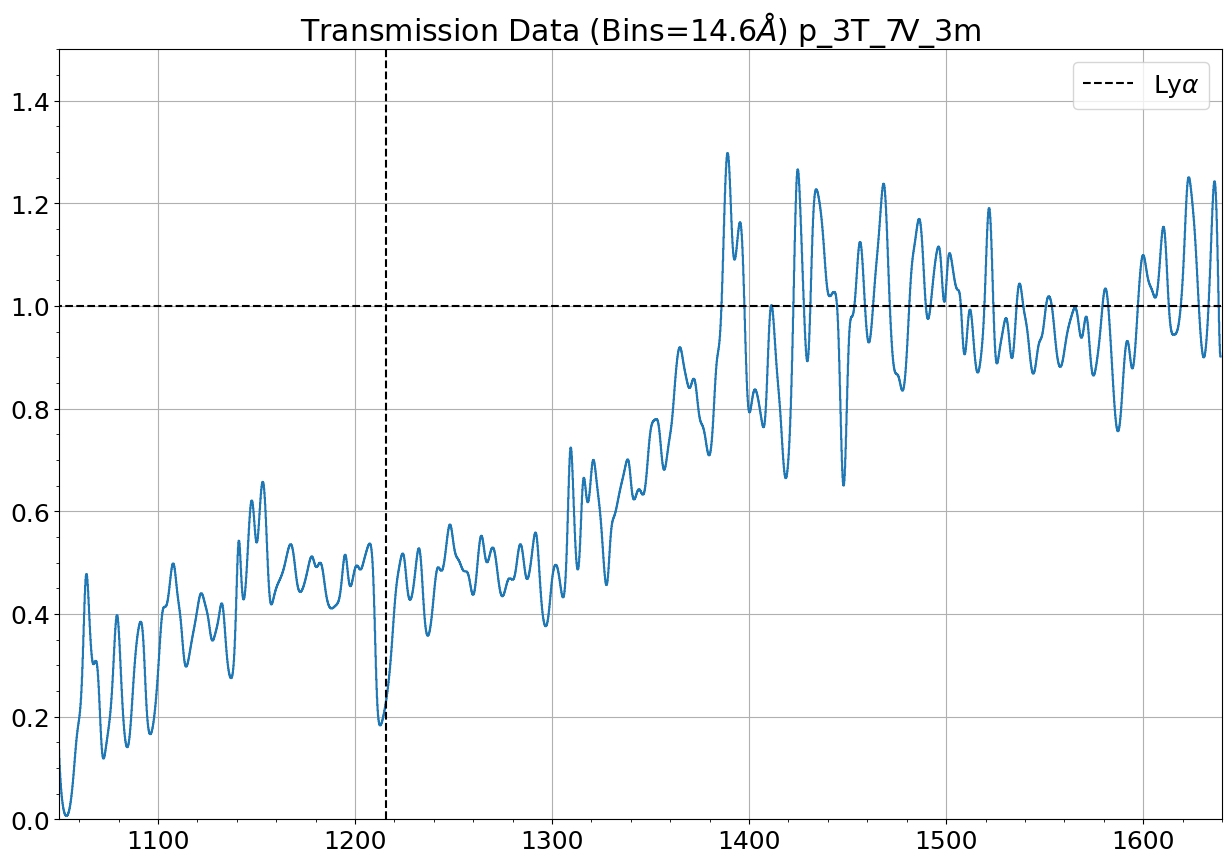

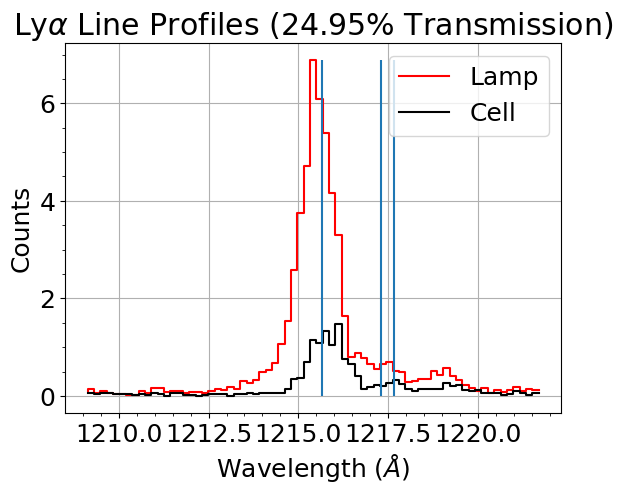

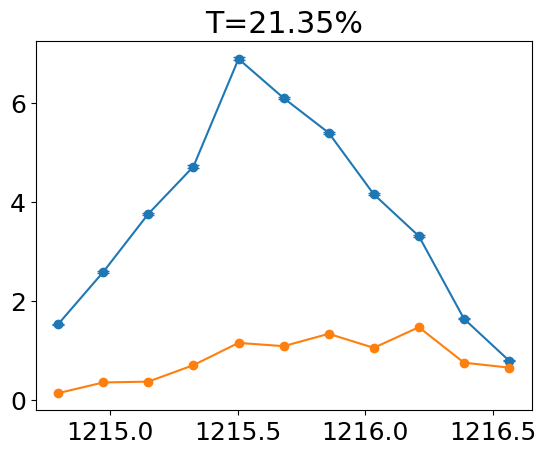

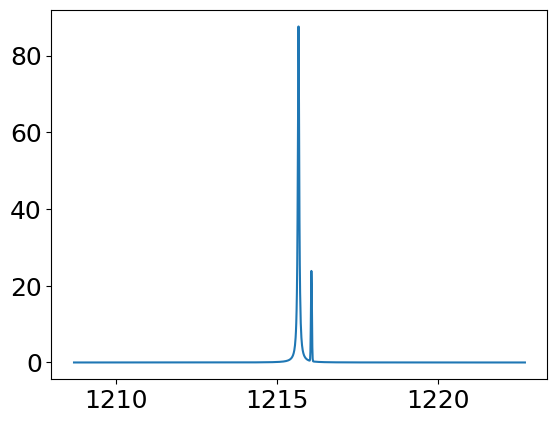

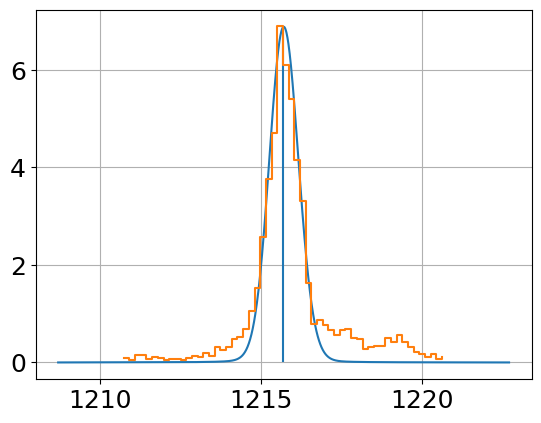

In [7]:
directory_date = '02_06_2025'
sub_directory = 'Processed'
date = '02_06_2025'
base_dir = os.path.join(directory_date)
sub_dir = os.path.join(sub_directory)


id_lamp = 'lamp_3T_7V_3m'
#id_filament_dark = 'darkf_3.5A_2T'
id_cell = 'cell_3T_7V_3m'

lamp_filename = os.path.join(base_dir, sub_dir, f'{date}_{id_lamp}_processed.csv')
#filament_dark_filename = os.path.join(base_dir, sub_dir, f'{date}_{id_filament_dark}_processed.csv')
cell_filename = os.path.join(base_dir, sub_dir, f'{date}_{id_cell}_processed.csv')
    

name = lamp_filename[23:49]

analyzer = SpectrumAnalyzer(lamp_filename, cell_filename)
trans_est, trans_real, trans_err = analyzer.analyze('calibration_plot.png',name)

wav = analyzer.lamda_lamp
length = np.where(np.isclose(wav,1215.7,atol=5))[0]
length2=np.where(np.isclose(wav,1215.7,atol=2.5))[0]
data_l = analyzer.y_e_lamp[length]
wav_l = analyzer.lamda_lamp[length]


data_cell = analyzer.y_e_cell[length]
wav_cell = analyzer.lamda_cell[length]
lam,lya_data,broad_lya_units = syn_lamp_func(amp=90,fwhm_G=0.01,fwhm_L=0.05,line_ratio=0.8,other_I=7)
plt.step(wav_l,data_l,where='post')

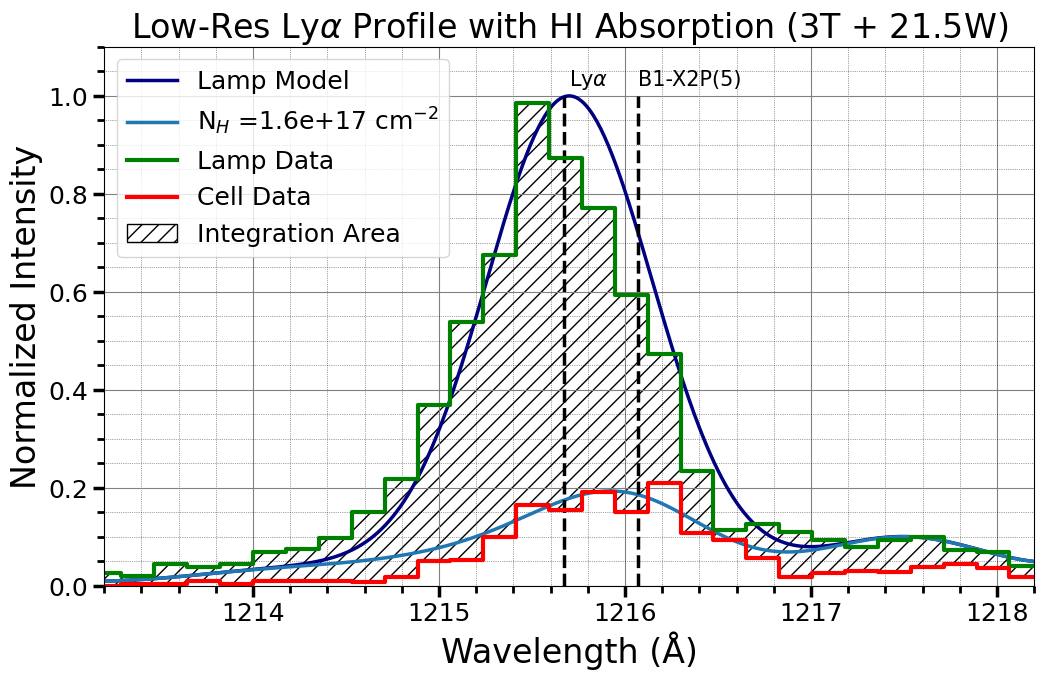

In [12]:
Nums=[17.2]
cmap = plt.get_cmap('tab10')  # Choose your colormap
num_datasets = len(Nums)+1
colors = [cmap(i / num_datasets) for i in range(num_datasets)]

y1s,y2s,t1s,Is = model_cell(Nums,lam,lya_data)
norm=max(broad_lya_units)
fig, axs = plt.subplots(1,1,figsize=(12,7))
y=y1s
cm2 = r'cm$^{-2}$'
axs.plot(lam,broad_lya_units/norm,color='navy',label='Lamp Model',lw=2.5)
for i,y in enumerate(y1s):
    axs.plot(lam,y/norm,ls='-',alpha=1,label=fr'N$_H$ ={10**Nums[i]:.1e} '+cm2,color=colors[i],lw=2.5)

axs.vlines(x=1215.67,ymin=0,ymax=1,color='black',ls='--',lw=2.5)
axs.vlines(x=1216.07,ymin=0,ymax=1,color='black',ls='--',lw=2.5)
#axs.hlines(y=0.5,xmin=1212,xmax=1220,color='red',ls='--',alpha=0.5)
axs.set_xlim(1213.2,1218.2)
axs.set_ylim(0,1.1)
axs.minorticks_on();
axs.grid(color='grey');
axs.grid(which='minor', linestyle=':',color='black',linewidth=0.5,alpha=0.7);
axs.tick_params(axis="both", which="major", length=8, width=2.5)  # Major ticks
axs.tick_params(axis="both", which="minor", length=5, width=2)  # Minor ticks

axs.text(1215.7,1.02,r'Ly$\alpha$',color='black',fontsize=15)
axs.text(1216.07,1.02,r'B1-X2P(5)',color='black',fontsize=15)
         
axs.set_title(r'Low-Res Ly$\alpha$ Profile with HI Absorption (3T + 21.5W)',fontsize=24)
axs.set_ylabel(r'Normalized Intensity',fontsize=24)
axs.set_xlabel(r'Wavelength (Å)',fontsize=24)
axs.step(wav_l, data_l/norm,label='Lamp Data',color='green',where='mid',lw=3)
axs.step(wav_l, data_cell/norm,label="Cell Data",color='red',where='mid',lw=3);

axs.fill_between(wav_l, data_l/norm, data_cell/norm,step='mid', color='none',hatch="//", edgecolor="black", alpha=1,label='Integration Area')
axs.legend(loc='upper left');

#fig.savefig('Low_Res_lya3T.png', bbox_inches="tight")

NameError: name 'trans_units' is not defined

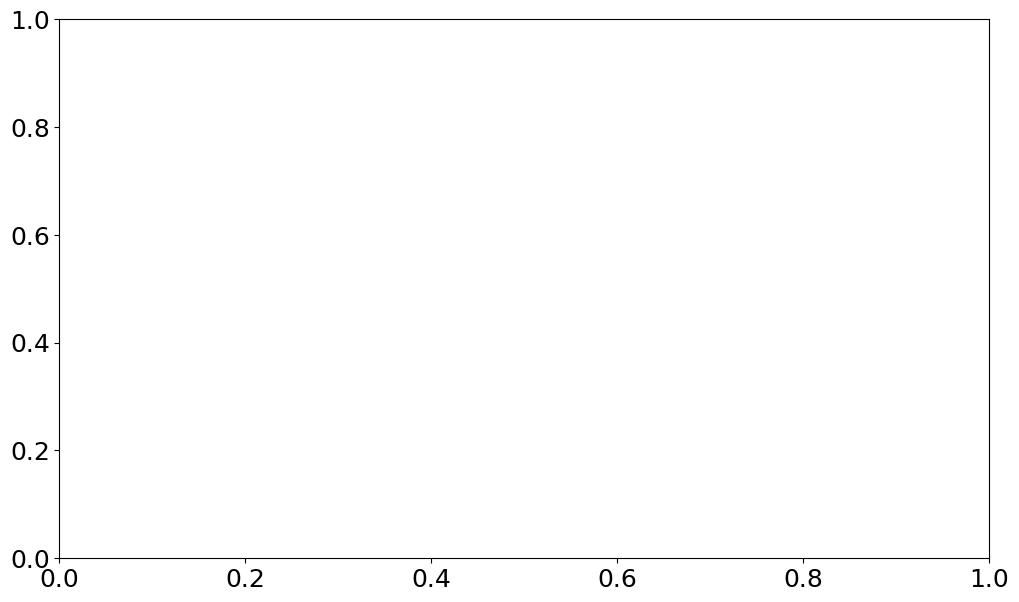

In [13]:
fig, axs = plt.subplots(1,1,figsize=(12,7))
y=trans_units
norm=max(lya_data)
axs.plot(lam,lya_data/norm,'-',color='navy',label='Lamp Only',lw=2)
#for i,y in enumerate(y2s):
    #axs[1].plot(lam,y/norm,ls='--',alpha=0.7,label=f'{10**Nums[i]:.1e} '+cm2,color=colors[i])
axs.plot(lam,t1s[0],ls='-',alpha=0.7,color=colors[0],label=fr'N$_H$ = {10**Nums[0]:.1e} '+cm2,lw=2)

#axs.vlines(x=1215.67,ymin=0,ymax=1,color='red',ls='--',alpha=0.5,label=f'1215.67$\AA$')
axs.set_xlim(1214.5,1217)
axs.set_ylim(0,1.1)

axs.vlines(x=1215.67,ymin=0,ymax=1.02,color='black',ls='--',lw=2.5)
axs.vlines(x=1216.07,ymin=0,ymax=1.02,color='black',ls='--',lw=2.5)
axs.text(1215.7,1.02,r'Ly$\alpha$',color='black',fontsize=15)
axs.text(1216.07,1.02,r'B1-X2P(5)',color='black',fontsize=15)

axs.set_ylabel(r'Transmission (Normalized)',fontsize=24)
axs.set_xlabel(r'Wavelength (Å)',fontsize=24)
axs.set_title(r'Model Lamp Output with HI Absorption Profile (3T + 21.5W)',fontsize=24)
axs.minorticks_on();
axs.grid(which='minor', linestyle=':',color='black',linewidth=0.5,alpha=0.7);
axs.tick_params(axis="both", which="major", length=8, width=2.5)  # Major ticks
axs.tick_params(axis="both", which="minor", length=5, width=2)  # Minor ticks

axs.legend()
axs.grid();
#fig.savefig('High_Res_lya3T.png', bbox_inches="tight")

C:\Users\jackf\Desktop\Rocket Group\LIDOS_data\EW_Ravi_v3.py:262: RuntimeWarning: divide by zero encountered in divide
  plt.step(self.lamda_lamp,self.y_e_cell_bin/self.y_e_lamp_bin)
C:\Users\jackf\Desktop\Rocket Group\LIDOS_data\EW_Ravi_v3.py:262: RuntimeWarning: invalid value encountered in divide
  plt.step(self.lamda_lamp,self.y_e_cell_bin/self.y_e_lamp_bin)


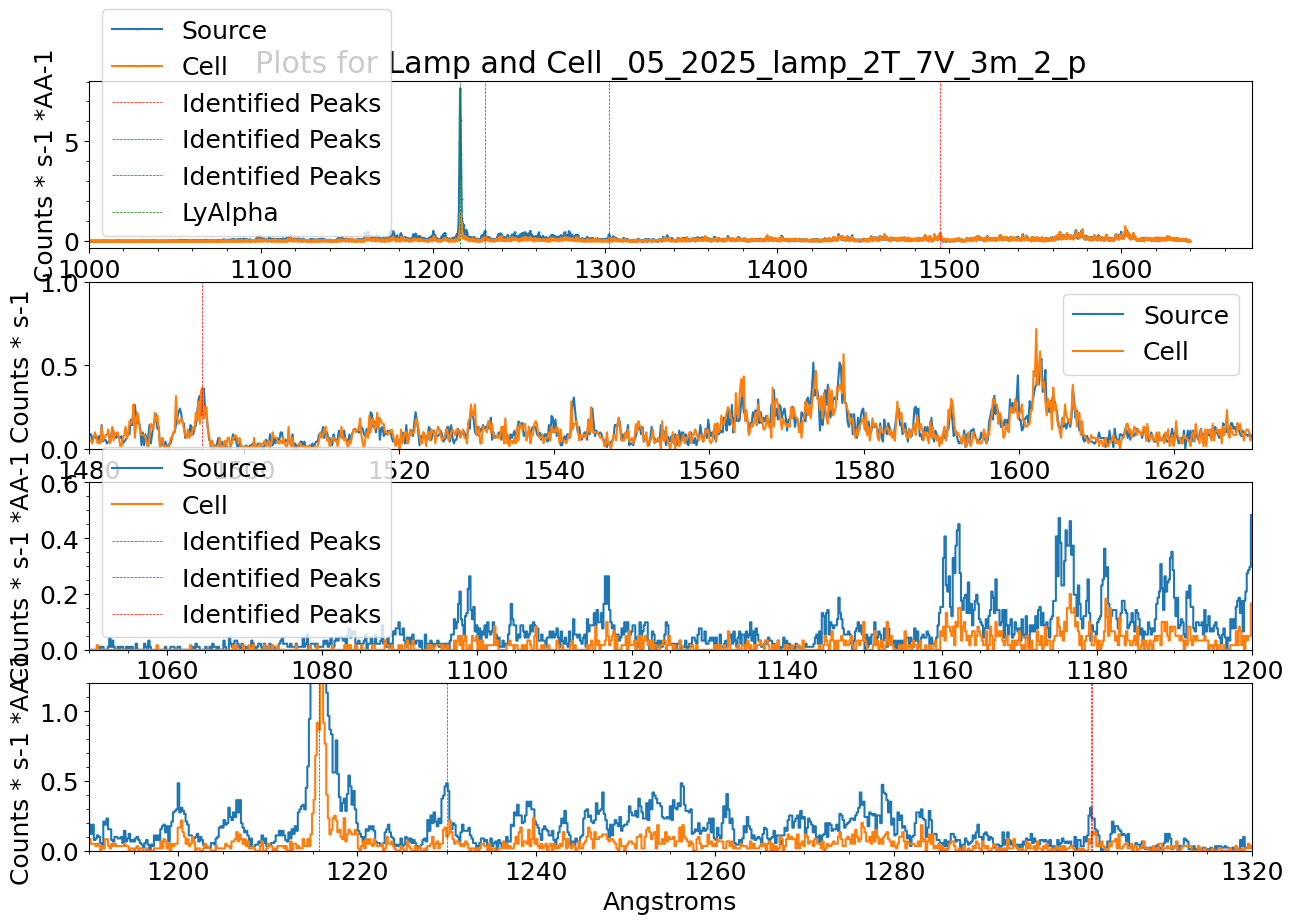

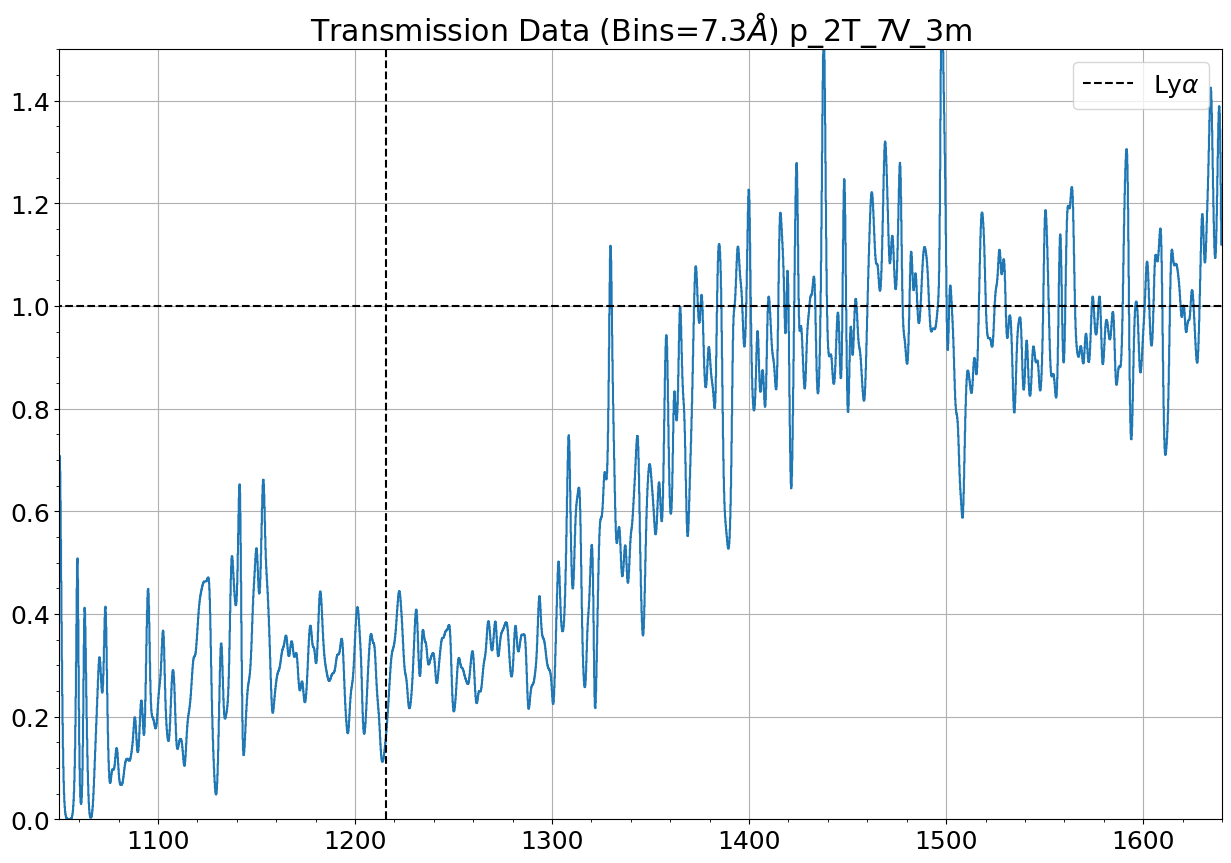

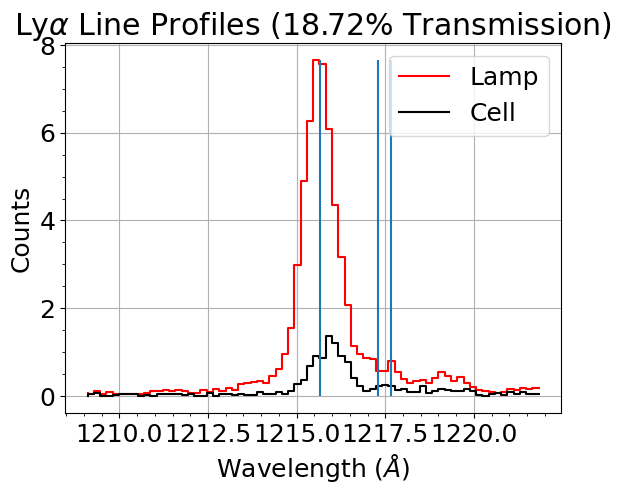

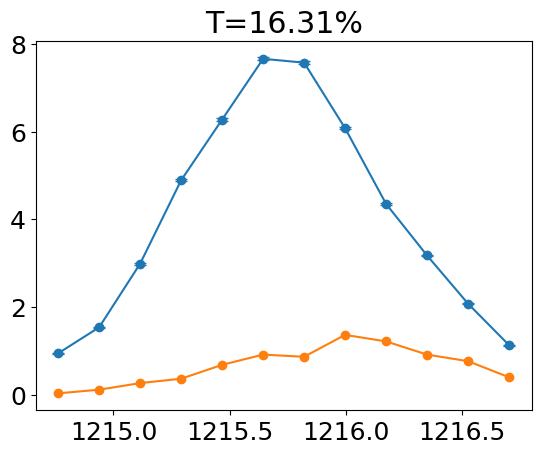

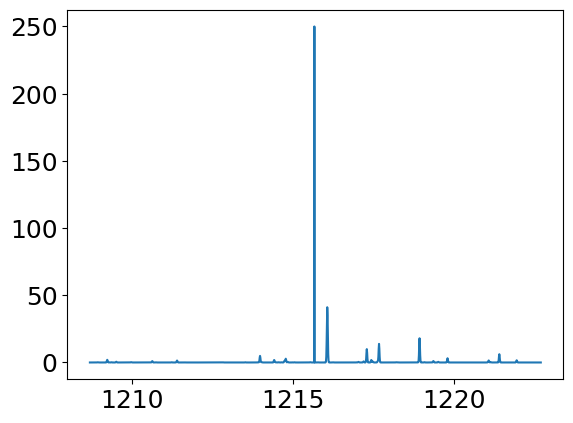

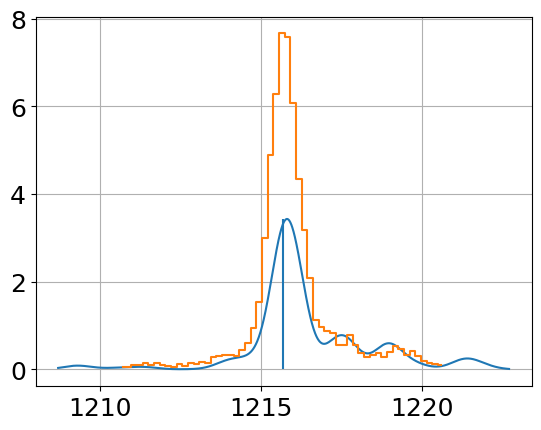

In [17]:
directory_date = '02_05_2025'
sub_directory = 'Processed'
date = '02_05_2025'
base_dir = os.path.join(directory_date)
sub_dir = os.path.join(sub_directory)


id_lamp = 'lamp_2T_7V_3m_2'
#id_filament_dark = 'darkf_3.5A_2T'
id_cell = 'cell_2T_7V_3m_2'

lamp_filename = os.path.join(base_dir, sub_dir, f'{date}_{id_lamp}_processed.csv')
#filament_dark_filename = os.path.join(base_dir, sub_dir, f'{date}_{id_filament_dark}_processed.csv')
cell_filename = os.path.join(base_dir, sub_dir, f'{date}_{id_cell}_processed.csv')
    

name = lamp_filename[23:49]

analyzer = SpectrumAnalyzer(lamp_filename, cell_filename)
trans_est, trans_real, trans_err = analyzer.analyze('calibration_plot.png',name)

wav = analyzer.lamda_lamp
length = np.where(np.isclose(wav,1215.7,atol=5))[0]
length2=np.where(np.isclose(wav,1215.7,atol=2.5))[0]
data_l = analyzer.y_e_lamp[length]
wav_l = analyzer.lamda_lamp[length]


data_cell = analyzer.y_e_cell[length]
wav_cell = analyzer.lamda_cell[length]

lam,lya_data,broad_lya_units = syn_lamp_func(amp=250,fwhm_G=1e-6,line_ratio=0.5,other_I=4e4)
plt.step(wav_l,data_l,where='mid')
#plt.ylim(0,10)

[6.93943359e+02 2.42032446e-03 1.88835649e-01 3.95911763e+04]


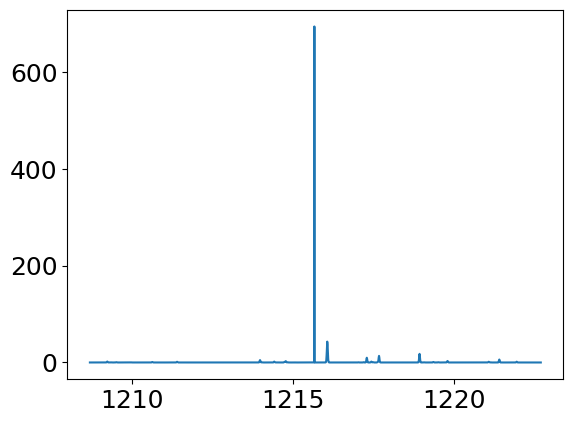

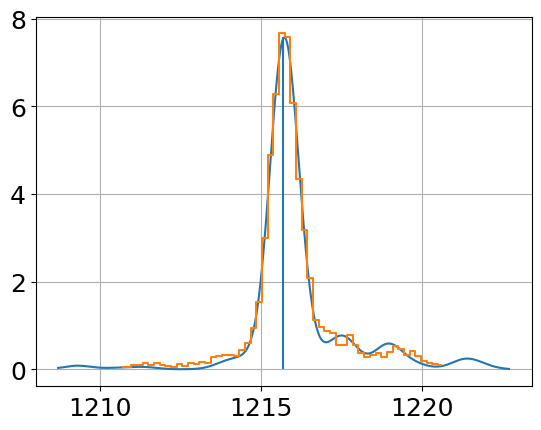

In [23]:
lam,lya_data,broad_lya_units = lamp_fit_func(wav_l,data_l,amp=250,fwhm_G=0.004,line_ratio=0.5,other_I=7e3) #Takes a min to run

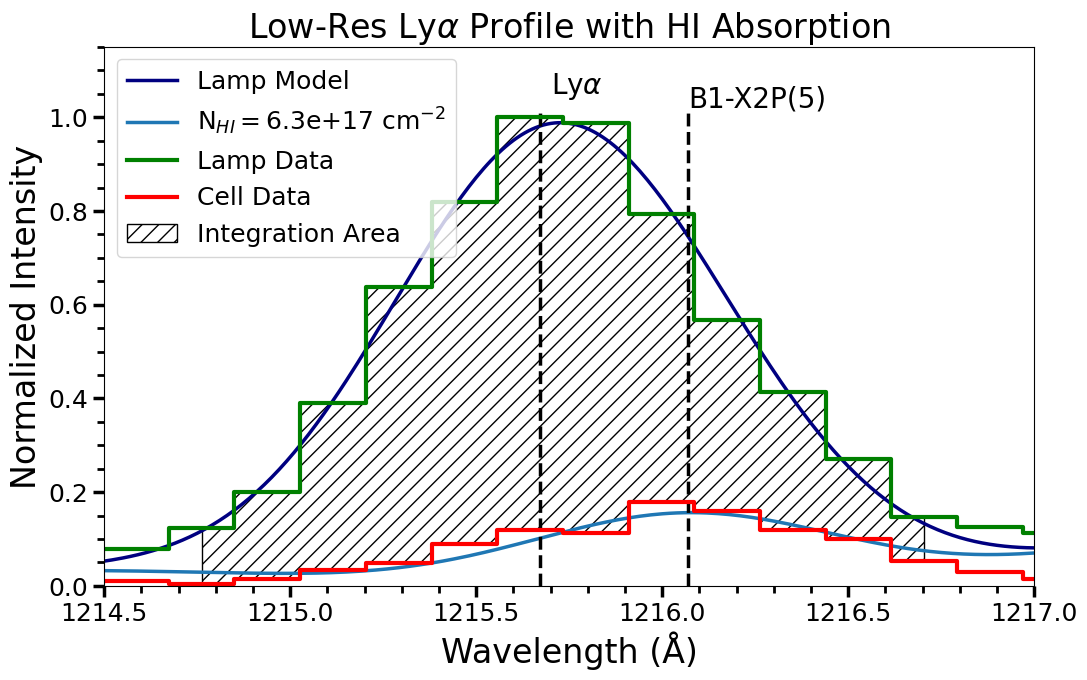

In [25]:
Nums=[17.8]
cmap = plt.get_cmap('tab10')  # Choose your colormap
num_datasets = len(Nums)+1
colors = [cmap(i / num_datasets) for i in range(num_datasets)]

y1s,y2s,t1s,Is = model_cell(Nums,lam,lya_data)

norm=max(data_l)
fig, axs = plt.subplots(1,1,figsize=(12,7))
y=y1s
cm2 = r'cm$^{-2}$'
NHI = r'N$_{HI} =$'
axs.plot(lam,broad_lya_units/norm,color='navy',label='Lamp Model',lw=2.5)
for i,y in enumerate(y1s):
    axs.plot(lam,y/norm,ls='-',alpha=1,color=colors[i],label=NHI+fr'{10**Nums[i]:.1e} '+cm2,lw=2.5)

axs.vlines(x=1215.67,ymin=0,ymax=1.02,color='black',ls='--',lw=2.5)
axs.vlines(x=1216.07,ymin=0,ymax=1.02,color='black',ls='--',lw=2.5)
#axs.hlines(y=0.5,xmin=1212,xmax=1220,color='red',ls='--',alpha=0.5)
axs.set_xlim(1214.5,1217)
axs.set_ylim(0,1.15)
axs.minorticks_on();
#axs.grid(color='grey');
#axs.grid(which='minor', linestyle=':',color='black',linewidth=0.5,alpha=0.7);
axs.tick_params(axis="both", which="major", length=8, width=2.5)  # Major ticks
axs.tick_params(axis="both", which="minor", length=5, width=2)  # Minor ticks

axs.text(1215.7,1.05,r'Ly$\alpha$',color='black',fontsize=20)
axs.text(1216.07,1.02,r'B1-X2P(5)',color='black',fontsize=20)

#Comment out 2T + 21 Watts
axs.set_title(r'Low-Res Ly$\alpha$ Profile with HI Absorption',fontsize=24)
axs.set_ylabel(r'Normalized Intensity',fontsize=24)
axs.set_xlabel(r'Wavelength (Å)',fontsize=24)
axs.step(wav_l, data_l/norm,label='Lamp Data',color='green',where='mid',lw=3)
axs.step(wav_l, data_cell/norm,label="Cell Data",color='red',where='mid',lw=3);

length = np.where(np.isclose(wav_l,1215.7,atol=1))[0]
axs.fill_between(wav_l[length], data_l[length]/norm, data_cell[length]/norm,step='mid', color='none',hatch="//", edgecolor="black", alpha=1,label='Integration Area')
axs.legend(loc='upper left');
fig.savefig('Low_Res_lya2T_new.png', bbox_inches="tight")



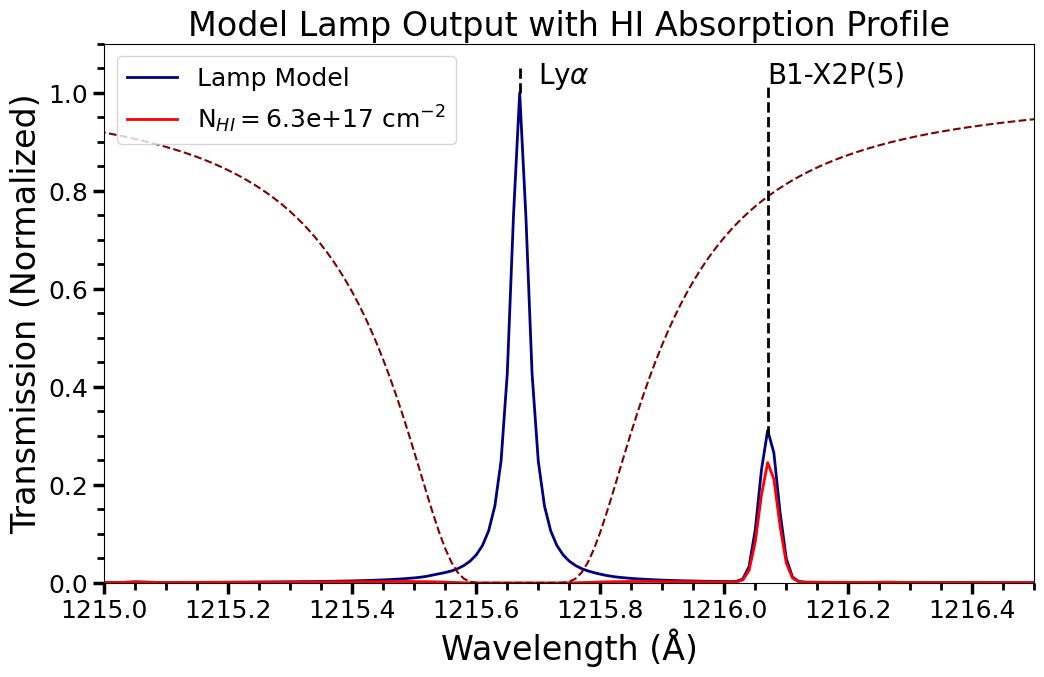

In [43]:
fig, axs = plt.subplots(1,1,figsize=(12,7))
y=y2s
norm=max(lya_data)
axs.plot(lam,lya_data/norm,'-',color='navy',label='Lamp Model',lw=2)
#for i,y in enumerate(y2s):
    #axs[1].plot(lam,y/norm,ls='--',alpha=0.7,label=f'{10**Nums[i]:.1e} '+cm2,color=colors[i])
axs.plot(lam,y2s[0]/norm,ls='-',color='red',label=NHI+fr'{10**Nums[0]:.1e} '+cm2,lw=2)
axs.plot(lam,t1s[0],ls='--',color='maroon')
#axs.vlines(x=1215.67,ymin=0,ymax=1,color='red',ls='--',alpha=0.5,label=f'1215.67$\AA$')
axs.set_xlim(1215,1216.5)
axs.set_ylim(0,1.1)

axs.vlines(x=1215.67,ymin=1,ymax=1.05,color='black',ls='--',lw=2)
axs.vlines(x=1216.07,ymin=0.3,ymax=1.02,color='black',ls='--',lw=2)
axs.text(1215.7,1.02,r'Ly$\alpha$',color='black',fontsize=20)
axs.text(1216.07,1.02,r'B1-X2P(5)',color='black',fontsize=20)

axs.set_ylabel(r'Transmission (Normalized)',fontsize=24)
axs.set_xlabel(r'Wavelength (Å)',fontsize=24)
axs.set_title(r'Model Lamp Output with HI Absorption Profile',fontsize=24)
axs.minorticks_on();
#axs.grid(which='minor', linestyle=':',color='black',linewidth=0.5,alpha=0.7);
axs.tick_params(axis="both", which="major", length=8, width=2.5)  # Major ticks
axs.tick_params(axis="both", which="minor", length=5, width=2)  # Minor ticks

axs.legend(loc='upper left');
#axs.grid();
fig.savefig('High_Res_lya2T_new.png', bbox_inches="tight")

In [ ]:
directory_date = '02_07_2025'
sub_directory = 'Processed'
date = '02_07_2025'
base_dir = os.path.join(directory_date)
sub_dir = os.path.join(sub_directory)


id_lamp = 'lamp_1T_7V_3m'
#id_filament_dark = 'darkf_3.5A_2T'
id_cell = 'cell_1T_7V_3m'

lamp_filename = os.path.join(base_dir, sub_dir, f'{date}_{id_lamp}_processed.csv')
#filament_dark_filename = os.path.join(base_dir, sub_dir, f'{date}_{id_filament_dark}_processed.csv')
cell_filename = os.path.join(base_dir, sub_dir, f'{date}_{id_cell}_processed.csv')
    

name = lamp_filename[23:49]

analyzer = SpectrumAnalyzer(lamp_filename, cell_filename)
trans_est, trans_real, trans_err = analyzer.analyze('calibration_plot.png',name)

wav = analyzer.lamda_lamp
length = np.where(np.isclose(wav,1215.7,atol=5))[0]
length2=np.where(np.isclose(wav,1215.7,atol=2.5))[0]
data_l = analyzer.y_e_lamp[length]
wav_l = analyzer.lamda_lamp[length]


data_cell = analyzer.y_e_cell[length]
wav_cell = analyzer.lamda_cell[length]

lam,lya_data,broad_lya_units = lamp_func(amp=75,fwhm_G=0.01,fwhm_L=0.05,line_ratio=1.2,other_I=4e4)

In [ ]:
Nums=[17.2]
cmap = plt.get_cmap('tab10')  # Choose your colormap
  # Choose your colormap
num_datasets = len(Nums)
colors = [cmap(i / num_datasets) for i in range(num_datasets)]

y1s=[]
y2s=[]
t1s=[]
for N in Nums:
    trans,negative_tau,lama= h1abs_lya((N),2.5)

    abs_units = interp_func(lama,trans,lam)
    trans_units = abs_units*lya_data
    broad_trans_units = convolve(trans_units,gaussian_kernel,mode='same')
    y1s.append(broad_trans_units)
    y2s.append(trans_units)
    t1s.append(abs_units)
norm=max(broad_lya_units)
fig, axs = plt.subplots(1,1,figsize=(11,7))
y=broad_trans_units
cm2 = r'cm$^{-2}$'
axs.plot(lam,broad_lya_units/norm,color='navy',label='Lamp Model',lw=2.5)
for i,y in enumerate(y1s):
    axs.plot(lam,y/norm,ls='-',alpha=1,label=fr'N$_H$ ={10**Nums[i]:.1e} '+cm2,color=colors[i],lw=2.5)

axs.vlines(x=1215.67,ymin=0,ymax=1,color='black',ls='--',lw=2.5)
axs.vlines(x=1216.07,ymin=0,ymax=1,color='black',ls='--',lw=2.5)
#axs.hlines(y=0.5,xmin=1212,xmax=1220,color='red',ls='--',alpha=0.5)
axs.set_xlim(1213.2,1218.2)
axs.set_ylim(0,1.1)
axs.minorticks_on();
axs.grid(color='grey');
axs.grid(which='minor', linestyle=':',color='black',linewidth=0.5,alpha=0.7);
axs.text(1215.67,1.02,r'Ly$\alpha$',color='black',fontsize=15)
axs.text(1216.07,1.02,r'B1-X2P(5)',color='black',fontsize=15)
         
axs.set_title(r'Observed Ly$\alpha$ Profile with Modeled HI Absorption (1T + 19.5W)',fontsize=16)
axs.set_ylabel(r'Normalized Intensity',fontsize=16)
axs.set_xlabel(r'Wavelength (Å)',fontsize=16)
axs.step(wav_l, data_l/norm,label='Lamp Data',where='mid',color='green',lw=3)
axs.step(wav_l, data_cell/norm,label="Cell Data",where='mid',color='red',lw=3);

axs.fill_between(wav_l, data_l/norm, data_cell/norm,step='mid', color='none',hatch="//", edgecolor="black", alpha=1,label='Integration Area')
axs.legend(loc='upper left');
fig.savefig('Low_Res_lya1T.png', bbox_inches="tight")



In [ ]:
fig, axs = plt.subplots(1,1,figsize=(10,6))
y=trans_units
norm=max(lya_data)
axs.plot(lam,lya_data/norm,'-',lw=2.5,color='navy',label='Lamp Only')
#for i,y in enumerate(y2s):
    #axs[1].plot(lam,y/norm,ls='--',alpha=0.7,label=f'{10**Nums[i]:.1e} '+cm2,color=colors[i])
axs.plot(lam,t1s[0],lw=2.5,ls='--',alpha=1,color=colors[0],label=f'{10**Nums[0]:.1e} '+cm2)

#axs.vlines(x=1215.67,ymin=0,ymax=1,color='red',ls='--',alpha=0.5,label=f'1215.67$\AA$')
axs.set_xlim(1215,1216.5)
#axs.set_xlim(1214.5,1218)
#axs.set_ylim(0,max(y)+(0.1*max(y)))
axs.set_ylabel(r'Transmission (Normalized)',fontsize=16)
axs.set_xlabel(r'Wavelength (Å)',fontsize=16)
axs.set_title(r'Model Lamp Ly$\alpha$ profile with HI attenuation profile (2T + 21W)',fontsize=16)
axs.minorticks_on();
axs.legend()
axs.grid();
#fig.savefig('Low_Res_lya2.png')

In [ ]:
directory_date = '02_13_2025'
sub_directory = 'Processed'
date = '02_13_2025'
base_dir = os.path.join(directory_date)
sub_dir = os.path.join(sub_directory)


id_lamp = 'lamp_0.5T_7V_3m'
#id_filament_dark = 'darkf_3.5A_2T'
id_cell = 'cell_0.5T_7V_3m'

lamp_filename = os.path.join(base_dir, sub_dir, f'{date}_{id_lamp}_processed.csv')
#filament_dark_filename = os.path.join(base_dir, sub_dir, f'{date}_{id_filament_dark}_processed.csv')
cell_filename = os.path.join(base_dir, sub_dir, f'{date}_{id_cell}_processed.csv')
    

name = lamp_filename[23:49]

analyzer = SpectrumAnalyzer(lamp_filename, cell_filename)
trans_est, trans_real, trans_err = analyzer.analyze('calibration_plot.png',name)

wav = analyzer.lamda_lamp
length = np.where(np.isclose(wav,1215.7,atol=5))[0]
length2=np.where(np.isclose(wav,1215.7,atol=2.5))[0]
data_l = analyzer.y_e_lamp[length]
wav_l = analyzer.lamda_lamp[length]


data_cell = analyzer.y_e_cell[length]
wav_cell = analyzer.lamda_cell[length]

lam,lya_data,broad_lya_units = lamp_func(amp=72,fwhm_G=0.01,fwhm_L=0.05,line_ratio=1,other_I=2.7e4)

In [ ]:
Nums=[16.8]
cmap = plt.get_cmap('tab10')  # Choose your colormap
  # Choose your colormap
num_datasets = len(Nums)
colors = [cmap(i / num_datasets) for i in range(num_datasets)]

y1s=[]
y2s=[]
t1s=[]
for N in Nums:
    trans,negative_tau,lama= h1abs_lya((N),2.5)

    abs_units = interp_func(lama,trans,lam)
    trans_units = abs_units*lya_data
    broad_trans_units = convolve(trans_units,gaussian_kernel,mode='same')
    y1s.append(broad_trans_units)
    y2s.append(trans_units)
    t1s.append(abs_units)
norm=max(broad_lya_units)
fig, axs = plt.subplots(1,1,figsize=(11,7))
y=broad_trans_units
cm2 = r'cm$^{-2}$'
axs.plot(lam,broad_lya_units/norm,color='navy',label='Lamp Model',lw=2.5)
for i,y in enumerate(y1s):
    axs.plot(lam,y/norm,ls='-',alpha=1,label=fr'N$_H$ ={10**Nums[i]:.1e} '+cm2,color=colors[i],lw=2.5)

axs.vlines(x=1215.67,ymin=0,ymax=1,color='black',ls='--',lw=2.5)
axs.vlines(x=1216.07,ymin=0,ymax=1,color='black',ls='--',lw=2.5)
#axs.hlines(y=0.5,xmin=1212,xmax=1220,color='red',ls='--',alpha=0.5)
axs.set_xlim(1213.2,1218.2)
axs.set_ylim(0,1.1)
axs.minorticks_on();
axs.grid(color='grey');
axs.grid(which='minor', linestyle=':',color='black',linewidth=0.5,alpha=0.7);
axs.text(1215.67,1.05,r'Ly$\alpha$',color='black',fontsize=15)
axs.text(1216.07,1.02,r'B1-X2P(5)',color='black',fontsize=15)
         
axs.set_title(r'Observed Ly$\alpha$ Profile with Modeled HI Absorption (0.5T + 18.5W)',fontsize=16)
axs.set_ylabel(r'Normalized Intensity',fontsize=16)
axs.set_xlabel(r'Wavelength (Å)',fontsize=16)
axs.step(wav_l, data_l/norm,label='Lamp Data',where='mid',color='green',lw=3)
axs.step(wav_l, data_cell/norm,label="Cell Data",where='mid',color='red',lw=3);

axs.fill_between(wav_l, data_l/norm, data_cell/norm,step='mid', color='none',hatch="//", edgecolor="black", alpha=1,label='Integration Area')
axs.legend(loc='upper left');
fig.savefig('Low_Res_lya0_5T.png', bbox_inches="tight")

In [ ]:
fig, axs = plt.subplots(1,1,figsize=(10,6))
y=trans_units
norm=max(lya_data)
axs.plot(lam,lya_data/norm,'-',lw=2.5,color='navy',label='Lamp Only')
#for i,y in enumerate(y2s):
    #axs[1].plot(lam,y/norm,ls='--',alpha=0.7,label=f'{10**Nums[i]:.1e} '+cm2,color=colors[i])
axs.plot(lam,t1s[0],lw=2.5,ls='--',alpha=1,color=colors[0],label=f'{10**Nums[0]:.1e} '+cm2)

#axs.vlines(x=1215.67,ymin=0,ymax=1,color='red',ls='--',alpha=0.5,label=f'1215.67$\AA$')
axs.set_xlim(1215,1216.5)
#axs.set_xlim(1214.5,1218)
#axs.set_ylim(0,max(y)+(0.1*max(y)))
axs.set_ylabel(r'Transmission (Normalized)',fontsize=16)
axs.set_xlabel(r'Wavelength (Å)',fontsize=16)
axs.set_title(r'Model Lamp Ly$\alpha$ profile with HI attenuation profile (0.5T + 18.5W)',fontsize=16)
axs.minorticks_on();
axs.legend()
axs.grid();



['Papa_bear\\2T_new\\02_27_2025_lamp_2T_1V_3m_processed.csv', 'Papa_bear\\2T_new\\02_27_2025_lamp_2T_2V_3m_processed.csv', 'Papa_bear\\2T_new\\02_27_2025_lamp_2T_4V_3m_processed.csv', 'Papa_bear\\2T_new\\02_27_2025_lamp_2T_5V_3m_processed.csv', 'Papa_bear\\2T_new\\02_27_2025_lamp_2T_6V_3m_processed.csv', 'Papa_bear\\2T_new\\02_27_2025_lamp_2T_7V_3m_processed.csv']
['Papa_bear\\2T_new\\02_27_2025_cell_2T_1V_3m_processed.csv', 'Papa_bear\\2T_new\\02_27_2025_cell_2T_2V_3m_processed.csv', 'Papa_bear\\2T_new\\02_27_2025_cell_2T_4V_3m_processed.csv', 'Papa_bear\\2T_new\\02_27_2025_cell_2T_5V_3m_processed.csv', 'Papa_bear\\2T_new\\02_27_2025_cell_2T_6V_3m_processed.csv', 'Papa_bear\\2T_new\\02_27_2025_cell_2T_7V_3m_processed.csv']


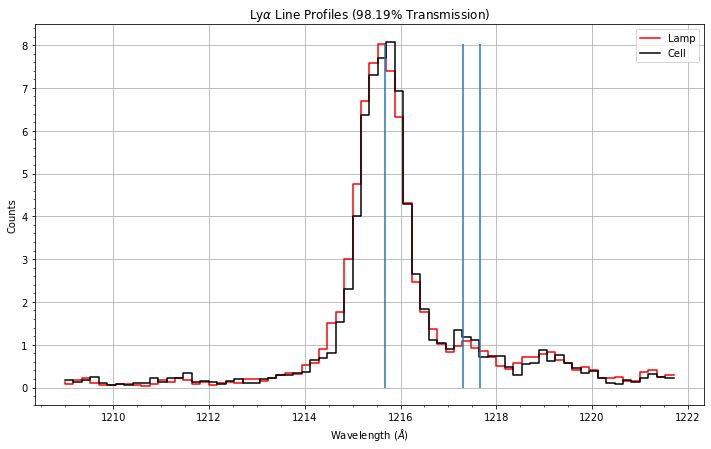

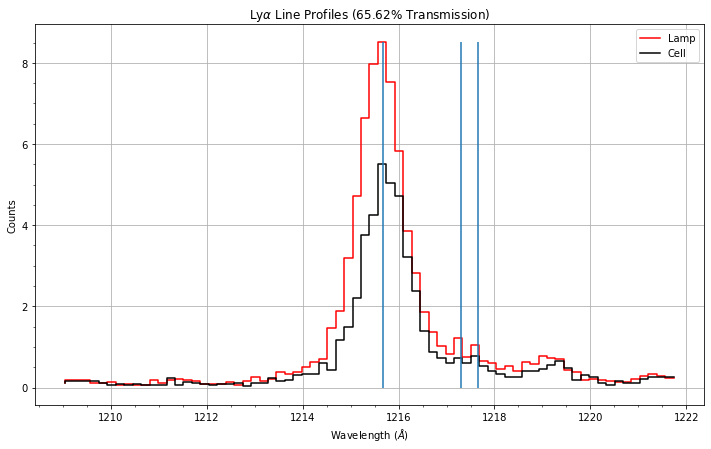

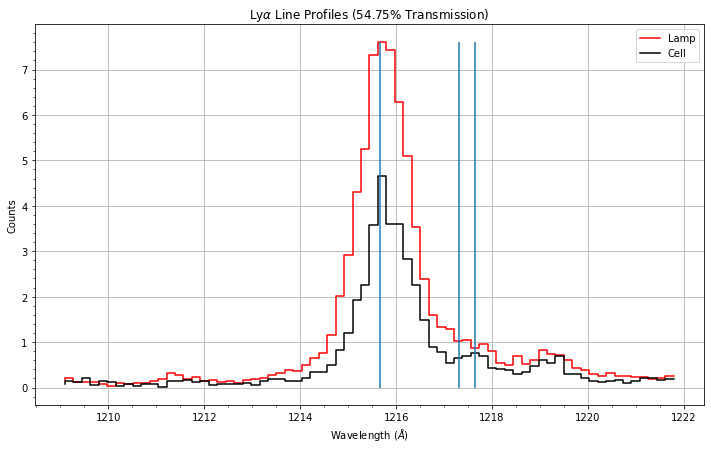

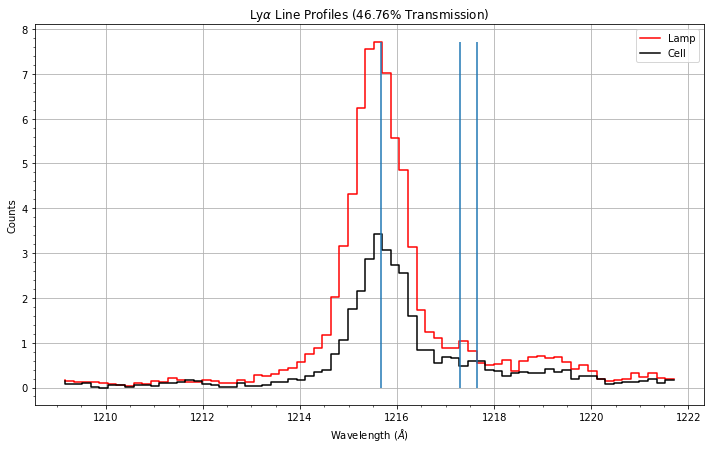

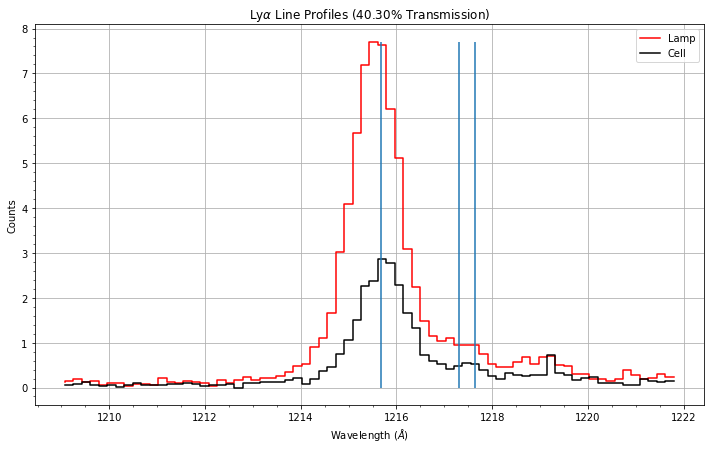

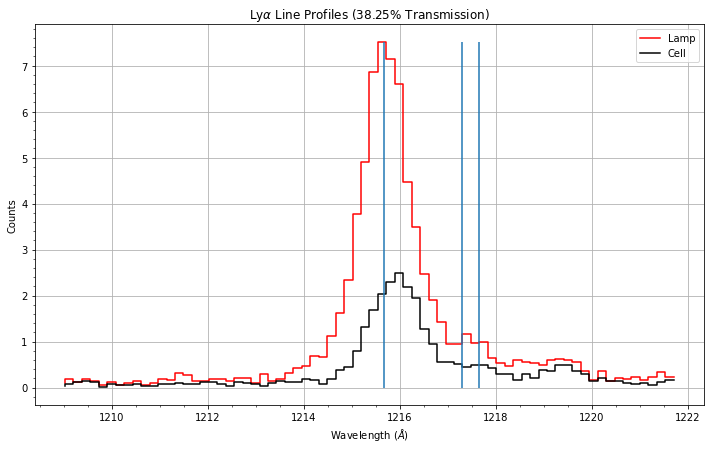

In [196]:
directory = 'Papa_bear'
sub_directory = '2T_new'
dir_name = os.path.join(directory,sub_directory)


#id_lamp = 'lamp_1T_6V_3m'
#id_filament_dark = 'darkf_3.5A_2T'
#id_cell = 'cell_1T_6V_3m'

lamp_filename= glob.glob(dir_name+'/*lamp*_*')
cell_filename= glob.glob(dir_name+'/*cell*_*')
print(lamp_filename)
print(cell_filename)

objs = []
for i in range(len(lamp_filename)):
    analyzer = SpectrumAnalyzer(lamp_filename[i], cell_filename[i])
    name = lamp_filename[i][13:40]
    trans_est, trans_real, trans_err = analyzer.analyze('calibration_plot.png',name)
    objs.append(analyzer)

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.0027218731745512143
            Iterations: 51
            Function evaluations: 239
            Gradient evaluations: 50


C:\Users\jackf\anaconda3\lib\site-packages\scipy\optimize\optimize.py:282: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


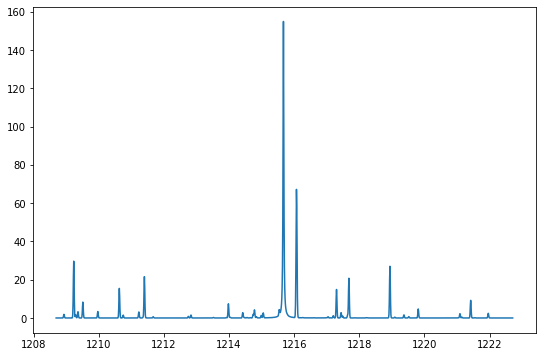

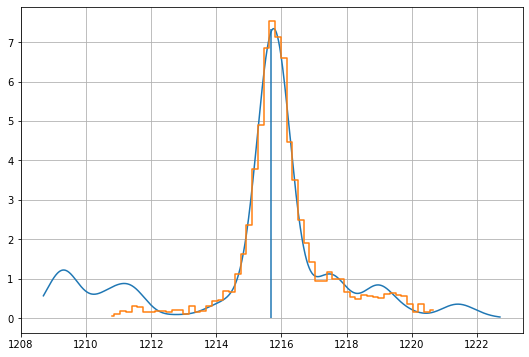

In [324]:
analyzer=objs[5]
wav = analyzer.lamda_lamp
length = np.where(np.isclose(wav,1215.7,atol=5))[0]

data_l = analyzer.y_e_lamp[length]
wav_l = analyzer.lamda_lamp[length]


data_cell = analyzer.y_e_cell[length]
wav_cell = analyzer.lamda_cell[length]


#lam,lya_data,broad_lya_units = lamp_func(amp=400,fwhm_G=0.01,fwhm_L=0.01,line_ratio=0.65,other_I=11)
lam,lya_data,broad_lya_units = lamp_func(amp=170,fwhm_G=0.01,fwhm_L=0.025,line_ratio=1.2,other_I=12)
plt.step(wav_l,data_l,where='mid')

[0.51093052 0.35765366 0.26363935 0.14938977 0.09727709 0.07475808]


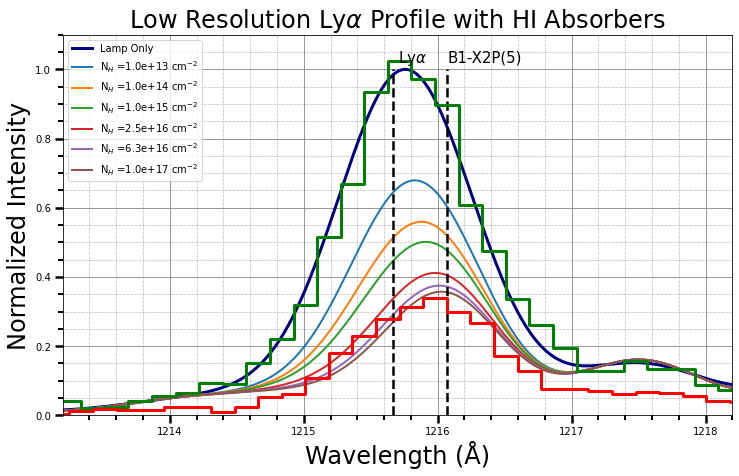

In [325]:
Nums=[13,14,15,16.4,16.8,17]
y1s,y2s,t1s,real_ratio = model_cell(Nums,lam,lya_data)

cmap = plt.get_cmap('Dark2')  # Choose your colormap
num_datasets = len(Nums)
colors = [cmap(i / num_datasets) for i in range(num_datasets)]


fig, axs = plt.subplots(1,1,figsize=(12,7))
y=broad_trans_units
norm=max(broad_lya_units)
cm2 = r'cm$^{-2}$'
axs.plot(lam,broad_lya_units/norm,color='navy',label='Lamp Only',lw=3)
for i,y in enumerate(y1s):
    axs.plot(lam,y/norm,ls='-',alpha=1,label=fr'N$_H$ ={10**Nums[i]:.1e} '+cm2,lw=2)

axs.vlines(x=1215.67,ymin=0,ymax=1,color='black',ls='--',lw=2.5)
axs.vlines(x=1216.07,ymin=0,ymax=1,color='black',ls='--',lw=2.5)
#axs.hlines(y=0.5,xmin=1212,xmax=1220,color='red',ls='--',alpha=0.5)
axs.set_xlim(1213.2,1218.2)
#plt.ylim(0,0.0005)
axs.minorticks_on();
axs.grid(color='grey');
axs.grid(which='minor', linestyle=':',color='black',linewidth=0.5,alpha=0.7);
axs.legend(loc='upper left');

axs.set_title(r'Low Resolution Ly$\alpha$ Profile with HI Absorbers',fontsize=24)
axs.set_ylabel(r'Normalized Intensity',fontsize=24)
axs.set_xlabel(r'Wavelength (Å)',fontsize=24)

axs.text(1215.7,1.02,r'Ly$\alpha$',color='black',fontsize=15)
axs.text(1216.07,1.02,r'B1-X2P(5)',color='black',fontsize=15)
axs.tick_params(axis="both", which="major", length=8, width=2.5)  # Major ticks
axs.tick_params(axis="both", which="minor", length=5, width=2)  # Minor ticks
axs.set_ylim(0,1.1)
axs.step(wav_l, data_l/norm,label='Lamp Data',where='mid',color='green',lw=3)
axs.step(wav_l-(wav_l[1]-wav_l[0]), data_cell/norm,label="Cell Data",where='post',color='red',lw=3);

#axs.fill_between(wav_l, data_l/norm, data_cell/norm,step='mid', color='none',hatch="//", edgecolor="black", alpha=1,label='Integration Area')
#axs[0].set_xticks(fontsize=16)

#fig.savefig('Low_Res_model.png', bbox_inches="tight")
print(real_ratio)

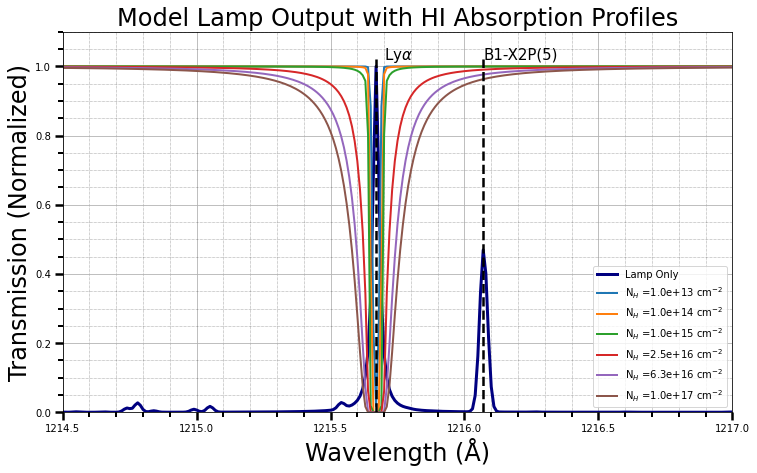

In [323]:
fig, axs = plt.subplots(1,1,figsize=(12,7))
y=trans_units
norm=max(lya_data)
axs.plot(lam,lya_data/norm,'-',color='navy',label='Lamp Only',lw=3)
for i,y in enumerate(y2s):
    #axs[1].plot(lam,y/norm,ls='--',alpha=0.7,label=f'{10**Nums[i]:.1e} '+cm2,color=colors[i])
    axs.plot(lam,t1s[i],ls='-',alpha=1,label=fr'N$_H$ ={10**Nums[i]:.1e} '+cm2,lw=2)

#axs.vlines(x=1215.67,ymin=0,ymax=1,color='red',ls='--',alpha=0.5,label=f'1215.67$\AA$')
axs.set_xlim(1214.5,1217)
axs.set_ylim(0,1.1)
axs.vlines(x=1215.67,ymin=0,ymax=1.02,color='black',ls='--',lw=2.5)
axs.vlines(x=1216.07,ymin=0,ymax=1.02,color='black',ls='--',lw=2.5)
axs.text(1215.7,1.02,r'Ly$\alpha$',color='black',fontsize=15)
axs.text(1216.07,1.02,r'B1-X2P(5)',color='black',fontsize=15)
#axs.set_xlim(1214.5,1218)
#axs.set_ylim(0,max(y)+(0.1*max(y)))

axs.set_ylabel(r'Transmission (Normalized)',fontsize=24)
axs.set_xlabel(r'Wavelength (Å)',fontsize=24)
axs.set_title(r'Model Lamp Output with HI Absorption Profiles',fontsize=24)

axs.minorticks_on();
axs.grid(which='minor', linestyle=':',color='black',linewidth=0.5,alpha=0.7);
axs.legend()
axs.tick_params(axis="both", which="major", length=8, width=2.5)  # Major ticks
axs.tick_params(axis="both", which="minor", length=5, width=2)  # Minor ticks
axs.grid();
#fig.savefig('High_Res_lya.png', bbox_inches="tight")

In [ ]:
real_ratio

In [ ]:
simps(new[mask],new_l[mask])

In [ ]:
simps(lya_data[length2],lam[length2])